<a href="https://colab.research.google.com/github/Rizki-Kidut/Deploy-Image-Classification-Model/blob/main/Machine_Learning_Intermediate_Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data set for this submission is Indoor_CPVR_09 Dataset from MIT. The Data set consists of 67 indoor categories with 15613 images. The data downloaded from https://web.mit.edu/torralba/www/indoor.html and saved to my Google Drive.

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
print('Total Images : ')
original_data = ImageDataGenerator(
    rescale=1./255).flow_from_directory(
    ('/content/drive/MyDrive/kaggle/Images'),
    target_size = (256,256),
    class_mode = 'categorical')

Total Images : 
Found 15620 images belonging to 67 classes.


In [4]:
a = original_data.class_indices
class_name = dict((v,k) for k,v in a.items())
class_name

{0: 'airport_inside',
 1: 'artstudio',
 2: 'auditorium',
 3: 'bakery',
 4: 'bar',
 5: 'bathroom',
 6: 'bedroom',
 7: 'bookstore',
 8: 'bowling',
 9: 'buffet',
 10: 'casino',
 11: 'children_room',
 12: 'church_inside',
 13: 'classroom',
 14: 'cloister',
 15: 'closet',
 16: 'clothingstore',
 17: 'computerroom',
 18: 'concert_hall',
 19: 'corridor',
 20: 'deli',
 21: 'dentaloffice',
 22: 'dining_room',
 23: 'elevator',
 24: 'fastfood_restaurant',
 25: 'florist',
 26: 'gameroom',
 27: 'garage',
 28: 'greenhouse',
 29: 'grocerystore',
 30: 'gym',
 31: 'hairsalon',
 32: 'hospitalroom',
 33: 'inside_bus',
 34: 'inside_subway',
 35: 'jewelleryshop',
 36: 'kindergarden',
 37: 'kitchen',
 38: 'laboratorywet',
 39: 'laundromat',
 40: 'library',
 41: 'livingroom',
 42: 'lobby',
 43: 'locker_room',
 44: 'mall',
 45: 'meeting_room',
 46: 'movietheater',
 47: 'museum',
 48: 'nursery',
 49: 'office',
 50: 'operating_room',
 51: 'pantry',
 52: 'poolinside',
 53: 'prisoncell',
 54: 'restaurant',
 55: 'r

In [5]:
pip install split-folders

In [6]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/kaggle/Images", output="/content/drive/MyDrive/kaggle/Images_output",
                   seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 15620 files [1:33:00,  2.80 files/s]


In [7]:
base_dir = ("/content/drive/MyDrive/kaggle/Images_output")
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "val")

In [8]:
print("Total of categories: ", len(os.listdir(train_dir)))

Total of categories:  67


In [9]:
print("Total of categories: ", len(os.listdir(validation_dir)))

Total of categories:  67


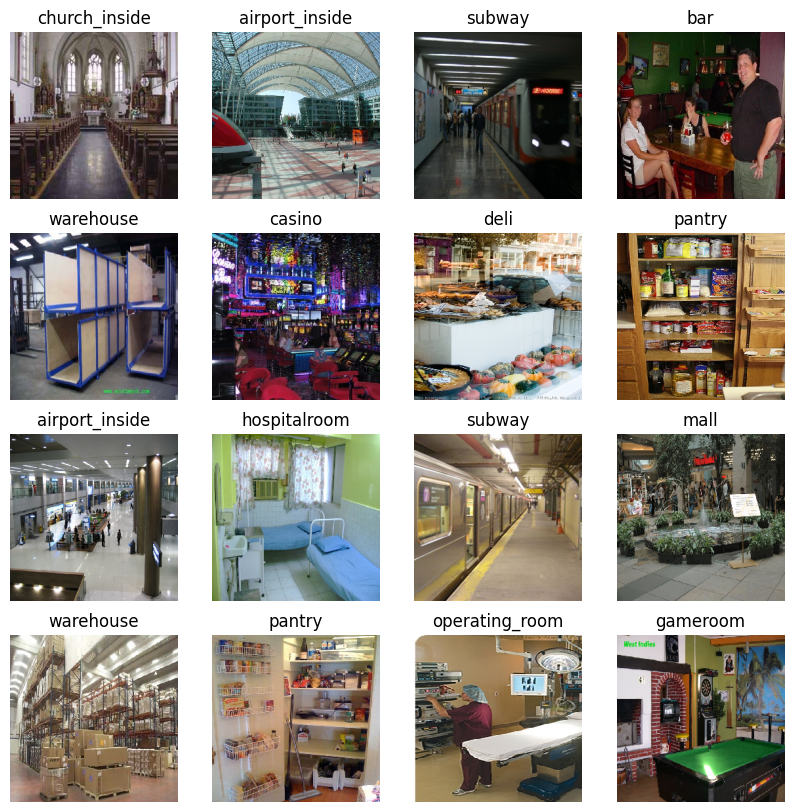

In [10]:
import numpy as np

plt.figure(figsize=(10, 10))
x,y= original_data.next()
for i in range(16):
      ax = plt.subplot(4, 4, i + 1)
      plt.imshow(x[i])
      plt.title(class_name[np.argmax(y[i])])
      plt.axis("off")

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,

    horizontal_flip=True,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                  rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=512,
    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=256,
    class_mode='categorical')

Found 12467 images belonging to 67 classes.
Found 3153 images belonging to 67 classes.


In [13]:
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs:{}):
    if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
      print("\n Akurasi sudah di atas 97%, hentikan training!")
      self.model.stop_training = True

es = EarlyStopping(patience=4,
                   monitor='val_accuracy',
                   restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss',
                       pattience=2,
                       factor=0.5,
                       verbose=2)

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201

base_model = DenseNet201(weights='imagenet', input_shape=(224,224,3), include_top=False)
base_model.trainable=False
base_model.summary()


74836368/74836368 [==============================] - 2s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormali

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.328047 to fit



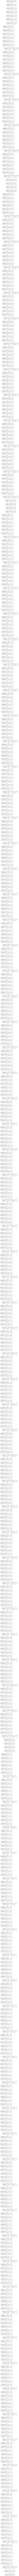

In [15]:
from tensorflow import keras

keras.utils.plot_model(
    base_model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True)

In [16]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(67, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 1920)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17280)             0         
                                                                 
 dense (Dense)               (None, 512)               8847872   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

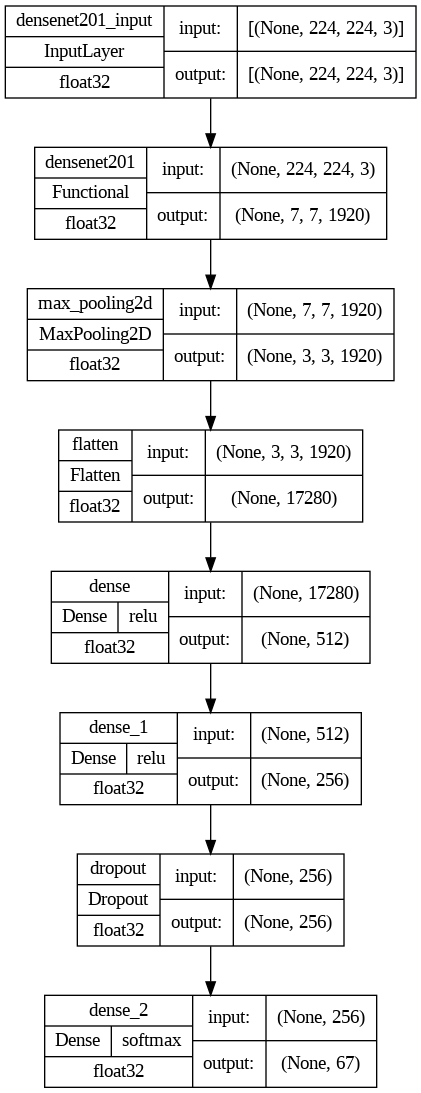

In [18]:
from tensorflow import keras

keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True)

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    verbose =2,
    callbacks=[es, lr, myCallback()]
)

Epoch 1/100


In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Plot Akurasi')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pathlib
export_dir = '/content/drive/MyDrive/kaggle/saved_model'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('indoor.tflite')
tflite_model_file.write_bytes(tflite_model)